**Exact Interference of Spherical Waves**   
**Author: Ramesh Bhatta, CIS, RIT**

In [23]:
## Importing Packages

import numpy as np
import matplotlib.pyplot as plt

In [24]:
## Predefined plot preferences--> This is my usual plot preference

# Define text sizes
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

# Apply text size settings
plt.rc('font', size=SMALL_SIZE)          # Default font size
plt.rc('axes', titlesize=MEDIUM_SIZE)   # Axis title font size
plt.rc('axes', labelsize=MEDIUM_SIZE)   # Axis labels font size
plt.rc('xtick', labelsize=SMALL_SIZE)   # X-axis tick label font size
plt.rc('ytick', labelsize=SMALL_SIZE)   # Y-axis tick label font size
plt.rc('legend', fontsize=SMALL_SIZE)   # Legend font size
plt.rc('figure', titlesize=BIGGER_SIZE) # Figure title font size

In [25]:
## Define Electric Field Function 

def E_field(N,a,z):
    lambda_ = 1
    a = a*lambda_
    k = (2*np.pi/lambda_)
    z = z*(lambda_)

    # Pixel Coordinates
    x = np.arange(1024) - 512
    y = np.arange(1024) - 512
    X, Y = np.meshgrid(x, y)

    # Net electric field amplitude and phase

    Aj = np.ones(N)
    phi_j = np.zeros(N)          ## Initial Phase zero
    E = np.zeros((1024, 1024), dtype=np.complex128)
    for j in range(N):
        xj = a*np.cos(2*np.pi*j/N)
        yj = a*np.sin(2*np.pi*j/N)
        # xj = [-a,a]
        # yj = [0,0]
        rj = np.sqrt((X-xj)**2 + (Y-yj)**2 + z**2)
        E += Aj[j]*np.exp(1j*phi_j[j])*np.exp(1j*k*rj)/rj

    # Plot of Amplitude and Phase Of Net Electric Field
    fig = plt.figure(figsize = (10,10))
    fig.add_subplot(121)
    plt.imshow(abs(E),extent=[-512, 511, -512, 511], cmap ='gray')
    plt.title(f"Magnitude Plot for Net Electric Field \n at z = {z}λ")
    plt.xlabel("x(um)")
    plt.ylabel("y(um)")
    plt.grid()

    fig.add_subplot(122)
    plt.imshow(np.angle(E),extent=[-512, 511, -512, 511], cmap = 'gray')
    plt.title(f"Phase Plot For Net Electric Field \n at z = {z}λ")
    plt.xlabel("x(um)")
    plt.ylabel("y(um)")

    plt.grid()
    plt.show()

    return abs(E), 0


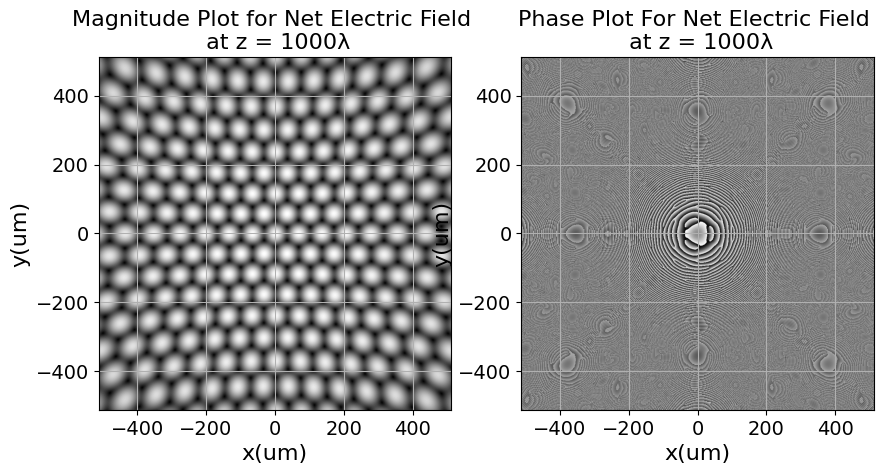

In [26]:
# Question A

#E_field(N,a,z)
E_1 = E_field(3,10,1000)

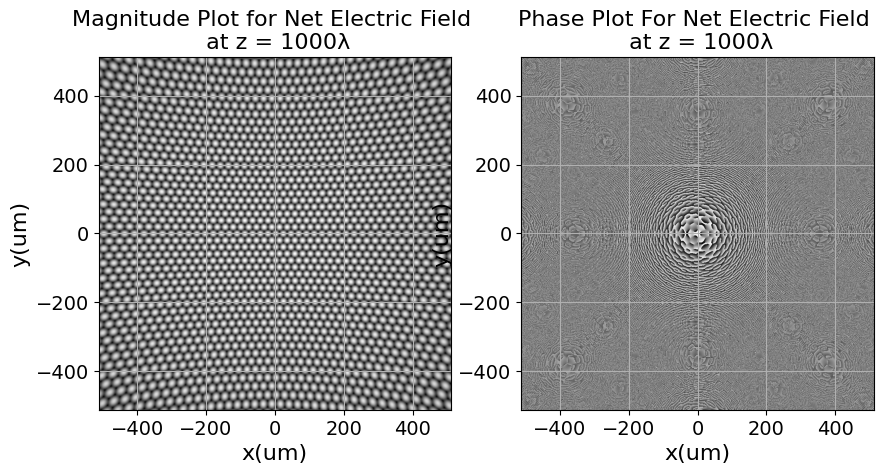

In [27]:
# Question B
E_2 = E_field(3,30,1000)

**Question C:**

**Observation:**

The three point sources behave as source of spherical waves and those waves go through a serious of constructive and destructive interference as they move along the "z" path to give us the above pattern. The pattern shows that the interference at the central region is more compact and clear than the outer region. The reason for this is that at smaller distances, if sources are very close then there is a rapid change in the phases of their wavefronts(shown in phase plot above) which will increase the interference between them giving us a pattern of bright(constructive) and dark(destructive) spot pattern. But as the waves travel far distance, we can see that the phase difference is not much and resulting in less interference creating a less compact, less uniform pattern on the edges. 

Also if we go far enough to observe the pattern these waves generate at extreme far-field, we will observe the resulting electric field will be only the summation of amplitude of each wave and "no effect of phase" is observed.

**Comparison**

The Interference pattern is mainly due to the phase difference between the waves. So, As we compare the two irradiance plots(Qa and Qb) and the two phase plots, we can see that as the value of "a" increases the sources come closer together which will give rise to more interference and a compact pattern in the central region. This can be observed directly from the plots above.  



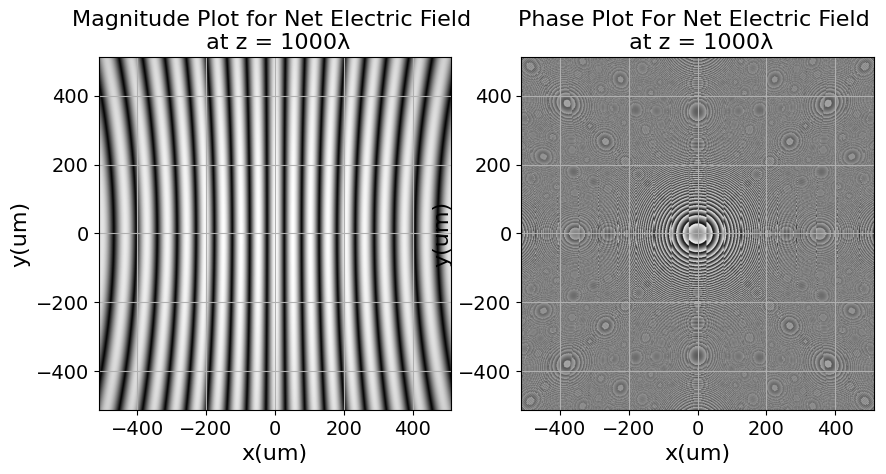

In [28]:
# Question D
E_3 = E_field(2,10,1000)

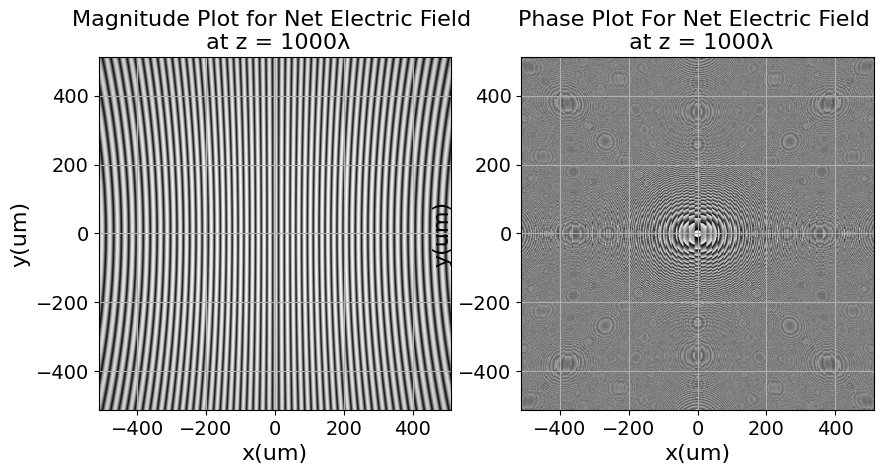

In [29]:
# Question E
E_4 = E_field(2,30,1000)










**Question F:**

**Explanation**

Basically the explanation for this question is almost the same as the explanation presented in question c. The difference in this question is that there are two sources "2a" distance apart lying on the horizontal axis at x = ±a. And the waves from these sources are interfering along the vertical lines at closer distances and along curves surface at far distances.

In part (e) the sources are more closer as compared to part (d) as a result we get more compact pattern in part (e). The phase plot also shows that for part(e) the phase is changing more rapidly in central region than that of part (d), which is the reason why we are getting the more compact pattern there.   

**Question G:**

If we take a = ±10λ units , then the distance z < π*(a^2)/λ = 100πλ in our case because λ = 1 units in micrometers. This would be our near field region and the distance z > 100πλ would be our far field. So taking values between these regions for our analysis. 

In [30]:
## Question G: 
## E_field(N,a,z)

def E_field_2(N,a,z):
    lambda_ = 1
    a = a*lambda_
    k = (2*np.pi/lambda_)

    # Pixel Coordinates
    x = np.arange(1024) - 512
    y = np.arange(1024) - 512
    X, Y = np.meshgrid(x, y)

    # Net electric field amplitude and phase

    Aj = np.ones(N)
    phi_j = np.zeros(N) 
    E = np.zeros((1024, 1024), dtype=np.complex128)         ## Initial Phase zero 
    for j in range(N):
        xj = a*np.cos(2*np.pi*j/N)
        yj = a*np.sin(2*np.pi*j/N)
        rj = np.sqrt((X-xj)**2 + (Y-yj)**2 + z**2)
        E += Aj[j]*np.exp(1j*phi_j[j])*np.exp(1j*k*rj)/rj

    return abs(E)

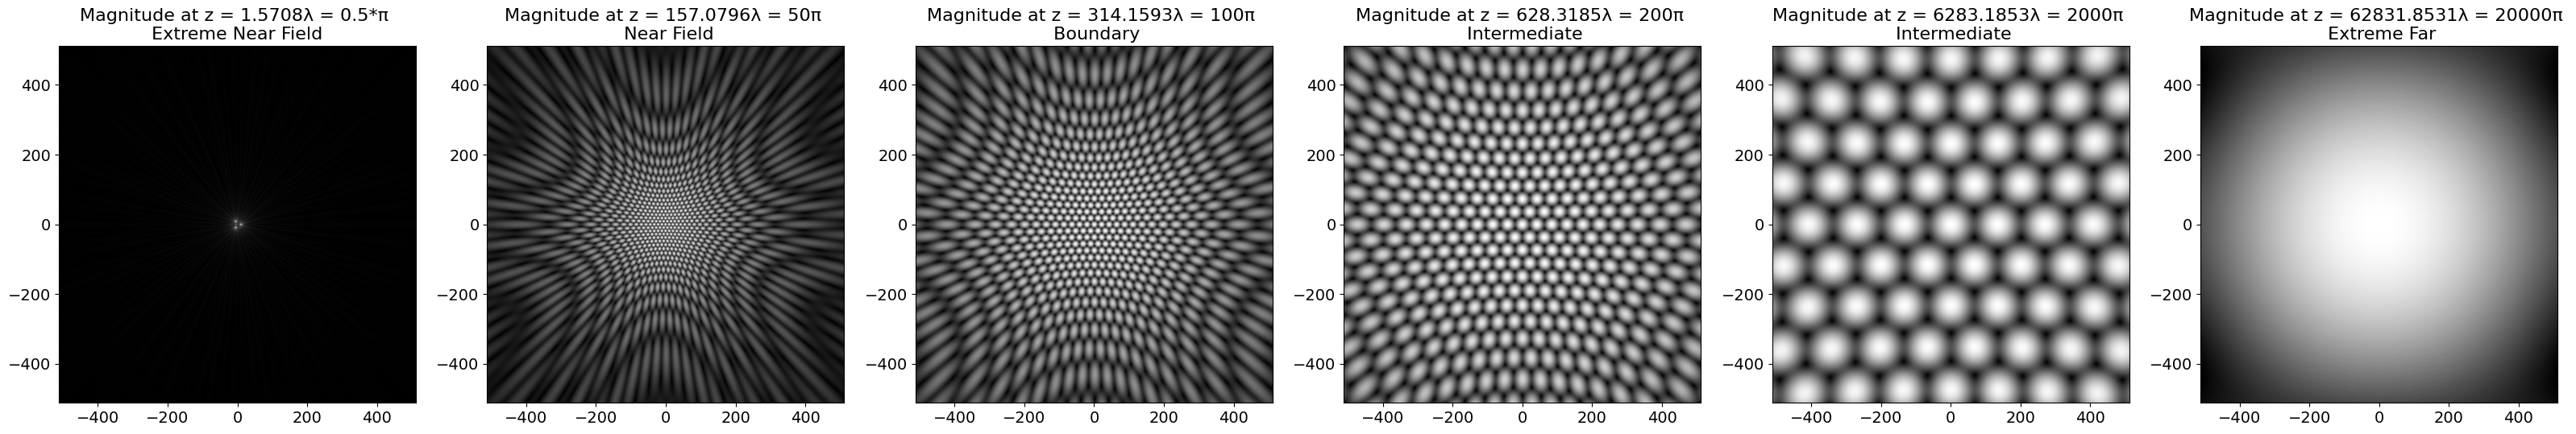

In [31]:
# Plot Of Amplitude and Phase Of Net Electric Field

fig = plt.figure(figsize = (40,40))
a = 10
fig.add_subplot(161)
plt.imshow(E_field_2(3,a,0.5*np.pi),extent=[-512, 511, -512, 511], cmap ='gray')
plt.title("Magnitude at z = {}λ = 0.5*π \n Extreme Near Field ".format(round(0.5*np.pi,4)))
fig.add_subplot(162)
plt.imshow(E_field_2(3,a,50*np.pi),extent=[-512, 511, -512, 511], cmap ='gray')
plt.title("Magnitude at z = {}λ = 50π \n Near Field".format(round(50*np.pi,4)))
fig.add_subplot(163)
plt.imshow(E_field_2(3,a,100*np.pi),extent=[-512, 511, -512, 511], cmap ='gray')
plt.title("Magnitude at z = {}λ = 100π \n Boundary".format(round(100*np.pi,4)))
fig.add_subplot(164)
plt.imshow(E_field_2(3,a,200*np.pi),extent=[-512, 511, -512, 511], cmap ='gray')
plt.title("Magnitude at z = {}λ = 200π \n Intermediate".format(round(200*np.pi,4)))
fig.add_subplot(165)
plt.imshow(E_field_2(3,a,2000),extent=[-512, 511, -512, 511], cmap ='gray')
plt.title("Magnitude at z = {}λ = 2000π \n Intermediate".format(round(2000*np.pi,4)))
fig.add_subplot(166)
plt.imshow(E_field_2(3,a,20000),extent=[-512, 511, -512, 511], cmap ='gray')
plt.title("Magnitude at z = {}λ = 20000π \n Extreme Far".format(round(20000*np.pi,4)))

# plt.xlabel("x(um)")
# plt.ylabel("y(um)")

plt.show()

**Question H:**

The last Image given in question "g" may be represented by a summation of only three equal amplitude plane waves because that image represent the extreme-far field interference zone at which the change in phase is approximately zero and we only "see" a plane wave at that distance.This implies that the contribution of wavefronts from each source gives a constructive intereference providing the electric field almost equal  to the sum of amplitude of each waves.